In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

train_df = pd.read_csv('../data/toxic/train.csv')
test_df = pd.read_csv('../data/toxic/test.csv')

In [2]:
train_df.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
110257,4dcb6bc4f5940c10,WHY \n\nDID YOU DELETE MY LAST MESSAGE YOU RAG...,0,0,0,0,0,0
149653,5f44132ccea14f54,Removed Pending Changes Reviewer userbox \n\nI...,0,0,0,0,0,0
127378,a94128f203d028c5,Oh did I forget to mention they have thier own...,0,0,0,0,0,0
80554,d7846c255c760d9a,Interesting that Murry1975 should turn up here...,0,0,0,0,0,0
50112,85f18fa8645d2965,"""\nThe interest of the task force has nothing ...",0,0,0,0,0,0


In [3]:
cols_target = ['obscene', 'insult', 'toxic', 'severe_toxic', 'identity_hate', 'threat']

In [4]:
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
unlabelled_in_all = train_df[(train_df['toxic'] != 1) & (train_df['severe_toxic'] != 1) & (train_df['obscene'] != 1) &
                             (train_df['threat'] != 1) & (train_df['insult'] != 1) & (train_df['identity_hate'] != 1)]
print('Percentage of unlabelled comments is ', len(unlabelled_in_all) / len(train_df) * 100)

Percentage of unlabelled comments is  89.83211235124176


In [6]:
no_comment = train_df[train_df['comment_text'].isnull()]
len(no_comment)

0

In [7]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [8]:
no_comment = test_df[test_df['comment_text'].isnull()]
no_comment

,id,comment_text


In [9]:
print('Total rows in test is {}'.format(len(test_df)))
print('Total rows in train is {}'.format(len(train_df)))
print(train_df[cols_target].sum())

Total rows in test is 153164
Total rows in train is 159571
obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


In [10]:
train_df['char_length'] = train_df['comment_text'].apply(lambda x: len(str(x)))

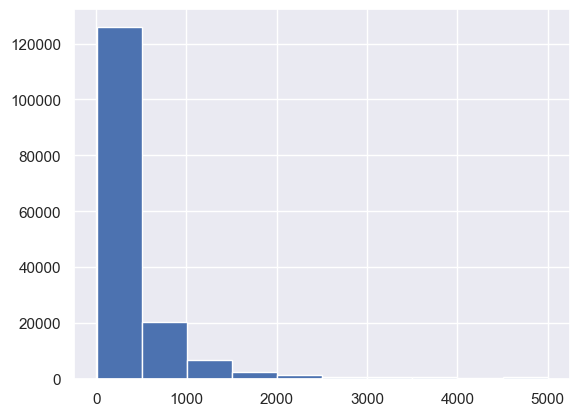

In [11]:
sns.set()
train_df['char_length'].hist()
plt.show()

In [12]:
data = train_df[cols_target]

<Axes: title={'center': 'Correlation of features & targets'}>

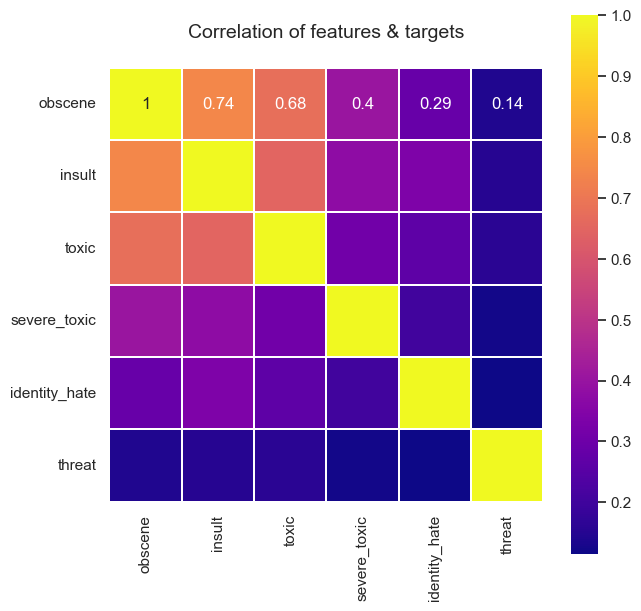

In [13]:
colormap = plt.cm.plasma
plt.figure(figsize=(7, 7))
plt.title('Correlation of features & targets', y=1.05, size=14)
sns.heatmap(data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap,
            linecolor='white', annot=True)

In [14]:
test_df['char_length'] = test_df['comment_text'].apply(lambda x: len(str(x)))

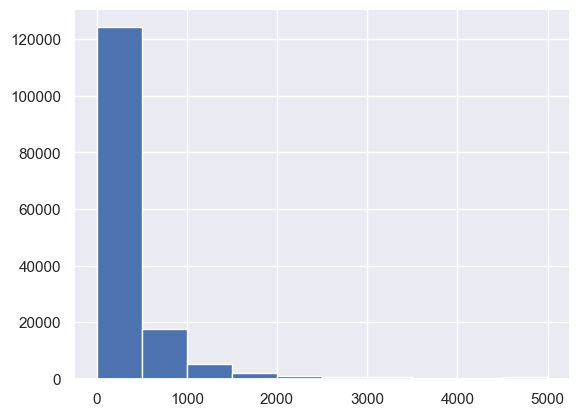

In [15]:
plt.figure()
plt.hist(test_df['char_length'])
plt.show()

In [16]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [17]:
train_df['comment_text'] = train_df['comment_text'].map(lambda com: clean_text(com))

In [18]:
test_df['comment_text'] = test_df['comment_text'].map(lambda com: clean_text(com))

In [19]:
train_df = train_df.drop('char_length', axis=1)

In [20]:
X = train_df.comment_text
test_X = test_df.comment_text

In [21]:
print(X.shape, test_X.shape)

(159571,) (153164,)


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=5000, stop_words='english')
vect

TfidfVectorizer(max_features=5000, stop_words='english')

In [23]:
X_dtm = vect.fit_transform(X)
X_dtm

<159571x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3178792 stored elements in Compressed Sparse Row format>

In [24]:
test_X_dtm = vect.transform(test_X)
test_X_dtm

<153164x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2618972 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(C=12.0)

submission_binary = pd.read_csv('../data/toxic/sample_submission.csv')

for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_df[label]
    logreg.fit(X_dtm, y)
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    test_y_prob = logreg.predict_proba(test_X_dtm)[:, 1]
    submission_binary[label] = test_y_prob

... Processing obscene
Training accuracy is 0.9810303877270933
... Processing insult
Training accuracy is 0.974281041041292
... Processing toxic
Training accuracy is 0.9631198651384023
... Processing severe_toxic
Training accuracy is 0.9911324739457671
... Processing identity_hate
Training accuracy is 0.9933571889629068
... Processing threat
Training accuracy is 0.9971987391192635


In [26]:
submission_binary.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999970,0.475984,0.999903,0.055632,0.966069,0.415467
1,0000247867823ef7,0.001947,0.001043,0.001886,0.001265,0.002453,0.000495
2,00013b17ad220c46,0.010740,0.000227,0.002714,0.000535,0.011381,0.000366
3,00017563c3f7919a,0.000966,0.000909,0.001952,0.000573,0.001184,0.000037
4,00017695ad8997eb,0.016077,0.000387,0.002068,0.000409,0.004028,0.000705


In [27]:
submission_binary.to_csv('submission_binary.csv', index=False)

In [28]:
submission_chains = pd.read_csv('../data/toxic/sample_submission.csv')


def add_feature(X, feature_to_add):
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [29]:
for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_df[label]
    logreg.fit(X_dtm, y)
    y_pred_X = logreg.predict(X_dtm)
    print('Training Accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    test_y = logreg.predict(test_X_dtm)
    test_y_prob = logreg.predict_proba(test_X_dtm)[:, 1]
    submission_chains[label] = test_y_prob
    X_dtm = add_feature(X_dtm, y)
    print('Shape of X_dtm is now {}'.format(X_dtm.shape))
    test_X_dtm = add_feature(test_X_dtm, test_y)
    print('Shape of test_X_dtm is now {}'.format(test_X_dtm.shape))

... Processing obscene
Training Accuracy is 0.9810303877270933
Shape of X_dtm is now (159571, 5001)
Shape of test_X_dtm is now (153164, 5001)
... Processing insult
Training Accuracy is 0.980334772609058
Shape of X_dtm is now (159571, 5002)
Shape of test_X_dtm is now (153164, 5002)
... Processing toxic
Training Accuracy is 0.9670366169291412
Shape of X_dtm is now (159571, 5003)
Shape of test_X_dtm is now (153164, 5003)
... Processing severe_toxic
Training Accuracy is 0.9915899505549254
Shape of X_dtm is now (159571, 5004)
Shape of test_X_dtm is now (153164, 5004)
... Processing identity_hate
Training Accuracy is 0.9949238896792023
Shape of X_dtm is now (159571, 5005)
Shape of test_X_dtm is now (153164, 5005)
... Processing threat
Training Accuracy is 0.9976311485169611
Shape of X_dtm is now (159571, 5006)
Shape of test_X_dtm is now (153164, 5006)


In [30]:
submission_chains.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999976,4.323590e-01,0.999903,0.101115,0.852376,0.536974
1,0000247867823ef7,0.002126,3.304863e-11,0.001886,0.000198,0.002496,0.000271
2,00013b17ad220c46,0.008032,1.305684e-11,0.002714,0.000096,0.008471,0.000341
3,00017563c3f7919a,0.000858,8.200046e-11,0.001952,0.000166,0.000914,0.000020
4,00017695ad8997eb,0.017422,1.339060e-11,0.002068,0.000179,0.004074,0.000300


In [31]:
submission_chains.to_csv('submission_chains.csv', index=False)

In [33]:
submission_combined = pd.read_csv('../data/toxic/sample_submission.csv')

In [34]:
for label in cols_target:
    submission_combined[label] = 0.5 * (submission_chains[label] + submission_binary[label])

In [35]:
submission_combined.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999973,0.454172,0.999903,0.078373,0.909222,0.476220
1,0000247867823ef7,0.002037,0.000521,0.001886,0.000732,0.002475,0.000383
2,00013b17ad220c46,0.009386,0.000114,0.002714,0.000316,0.009926,0.000354
3,00017563c3f7919a,0.000912,0.000454,0.001952,0.000370,0.001049,0.000028
4,00017695ad8997eb,0.016749,0.000193,0.002068,0.000294,0.004051,0.000502


In [36]:
submission_combined.to_csv('submission_combined.csv', index=False)